In [183]:
import numpy as np
import pandas as pd
import csv
import os
np.random.seed(12345)
import seaborn as sbn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt


In [184]:
data = pd.read_csv('/Users/rigel/Course Docs/Fall-2018/MachineLearning/project/dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv') 


In [185]:
#dropping URL, timedelta
data = data.drop(['url',' timedelta'],axis = 1)
type(data)
print (data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              39644 non-null float64
 data_channel_is_socmed           39644 non-null float64
 data_channel_is_tech             39

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [186]:
#drop boolean columns and standardize the data

boolean_columns = [
 " data_channel_is_lifestyle"                                                    
," data_channel_is_entertainment"                                               
," data_channel_is_bus"                                                         
," data_channel_is_socmed"                                                      
," data_channel_is_tech"                                                        
," data_channel_is_world"                                                       
," weekday_is_monday"                                                           
," weekday_is_tuesday"                                                          
," weekday_is_wednesday"                                                        
," weekday_is_thursday"                                                         
," weekday_is_friday"                                                           
," weekday_is_saturday"                                                         
," weekday_is_sunday"                                                           
," is_weekend"                                                                           
]
data_without_boolean=data.drop(labels=boolean_columns,axis=1)
std_data = data_without_boolean.copy()
data_without_boolean.columns
for column in data_without_boolean.columns:
        if column!=' shares':
            std_data[column] = preprocessing.scale(data_without_boolean[column])
std_data.describe()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,...,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000
mean,9.870760e-16,-6.742720e-17,-5.504820e-17,-5.662485e-17,-3.319569e-17,7.917522e-17,-1.118568e-15,-6.151348e-15,-9.754883e-16,9.717325e-16,...,-7.461619e-15,-2.285357e-14,-8.548751e-17,-1.777543e-14,-4.234480e-15,-5.032550e-16,6.234875e-15,8.559869e-16,3.228199e-16,3395.380184
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,11626.950749
min,-3.972899e+00,-1.160078e+00,-1.557137e-01,-1.904869e-01,-2.110943e-01,-9.604492e-01,-8.543604e-01,-5.468724e-01,-3.042682e-01,-5.386389e+00,...,-1.338384e+00,-3.053998e+00,-5.797463e+00,-1.646847e+00,-9.358111e+00,-8.708066e-01,-4.036308e+00,-1.810719e+00,-6.896581e-01,1.000000
25%,-6.616566e-01,-6.378980e-01,-2.196895e-02,6.750748e-04,-1.943043e-02,-6.074626e-01,-5.949633e-01,-4.265258e-01,-3.042682e-01,-8.270459e-02,...,-6.372594e-01,-6.325204e-01,-5.391186e-01,-6.133826e-01,-1.834899e-01,-8.708066e-01,-2.690762e-01,-9.278964e-01,-6.896581e-01,946.000000
50%,-1.886220e-01,-2.919004e-01,-2.553544e-03,6.750753e-04,3.984330e-04,-2.544760e-01,-7.616896e-02,-4.265258e-01,-3.042682e-01,1.371904e-01,...,6.386488e-02,1.746388e-01,4.847016e-02,7.559352e-02,7.864213e-02,-4.081910e-01,-2.690762e-01,8.377486e-01,-6.896581e-01,1400.000000
75%,7.574472e-01,3.597638e-01,1.717856e-02,6.750757e-04,2.004862e-02,2.750039e-01,1.832282e-01,-6.548578e-02,-6.082908e-02,3.630995e-01,...,6.386488e-02,9.817980e-01,5.685644e-01,7.645696e-01,6.029062e-01,6.712454e-01,2.960086e-01,8.377486e-01,4.151124e-01,2800.000000
max,5.960828e+00,1.682755e+01,1.989545e+02,1.990003e+02,1.988838e+02,2.586653e+01,2.923571e+01,1.485750e+01,2.184869e+01,4.137038e+00,...,1.268410e+01,9.817980e-01,2.031912e+00,1.798034e+00,1.127170e+00,2.213297e+00,3.498156e+00,8.377486e-01,3.729424e+00,843300.000000


In [187]:
def popular(s):
    return 1 if s>1400 else 0
std_data[' popularity'] = std_data[' shares'].apply(popular)
#print (data.columns)
#s = data_without_boolean[' popularity']
#print(s.value_counts())
std_data = std_data.drop([' shares'],axis=1)
std_data.describe()



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
count,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,...,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000
mean,9.870760e-16,-6.742720e-17,-5.504820e-17,-5.662485e-17,-3.319569e-17,7.917522e-17,-1.118568e-15,-6.151348e-15,-9.754883e-16,9.717325e-16,...,-7.461619e-15,-2.285357e-14,-8.548751e-17,-1.777543e-14,-4.234480e-15,-5.032550e-16,6.234875e-15,8.559869e-16,3.228199e-16,0.493442
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.499963
min,-3.972899e+00,-1.160078e+00,-1.557137e-01,-1.904869e-01,-2.110943e-01,-9.604492e-01,-8.543604e-01,-5.468724e-01,-3.042682e-01,-5.386389e+00,...,-1.338384e+00,-3.053998e+00,-5.797463e+00,-1.646847e+00,-9.358111e+00,-8.708066e-01,-4.036308e+00,-1.810719e+00,-6.896581e-01,0.000000
25%,-6.616566e-01,-6.378980e-01,-2.196895e-02,6.750748e-04,-1.943043e-02,-6.074626e-01,-5.949633e-01,-4.265258e-01,-3.042682e-01,-8.270459e-02,...,-6.372594e-01,-6.325204e-01,-5.391186e-01,-6.133826e-01,-1.834899e-01,-8.708066e-01,-2.690762e-01,-9.278964e-01,-6.896581e-01,0.000000
50%,-1.886220e-01,-2.919004e-01,-2.553544e-03,6.750753e-04,3.984330e-04,-2.544760e-01,-7.616896e-02,-4.265258e-01,-3.042682e-01,1.371904e-01,...,6.386488e-02,1.746388e-01,4.847016e-02,7.559352e-02,7.864213e-02,-4.081910e-01,-2.690762e-01,8.377486e-01,-6.896581e-01,0.000000
75%,7.574472e-01,3.597638e-01,1.717856e-02,6.750757e-04,2.004862e-02,2.750039e-01,1.832282e-01,-6.548578e-02,-6.082908e-02,3.630995e-01,...,6.386488e-02,9.817980e-01,5.685644e-01,7.645696e-01,6.029062e-01,6.712454e-01,2.960086e-01,8.377486e-01,4.151124e-01,1.000000
max,5.960828e+00,1.682755e+01,1.989545e+02,1.990003e+02,1.988838e+02,2.586653e+01,2.923571e+01,1.485750e+01,2.184869e+01,4.137038e+00,...,1.268410e+01,9.817980e-01,2.031912e+00,1.798034e+00,1.127170e+00,2.213297e+00,3.498156e+00,8.377486e-01,3.729424e+00,1.000000


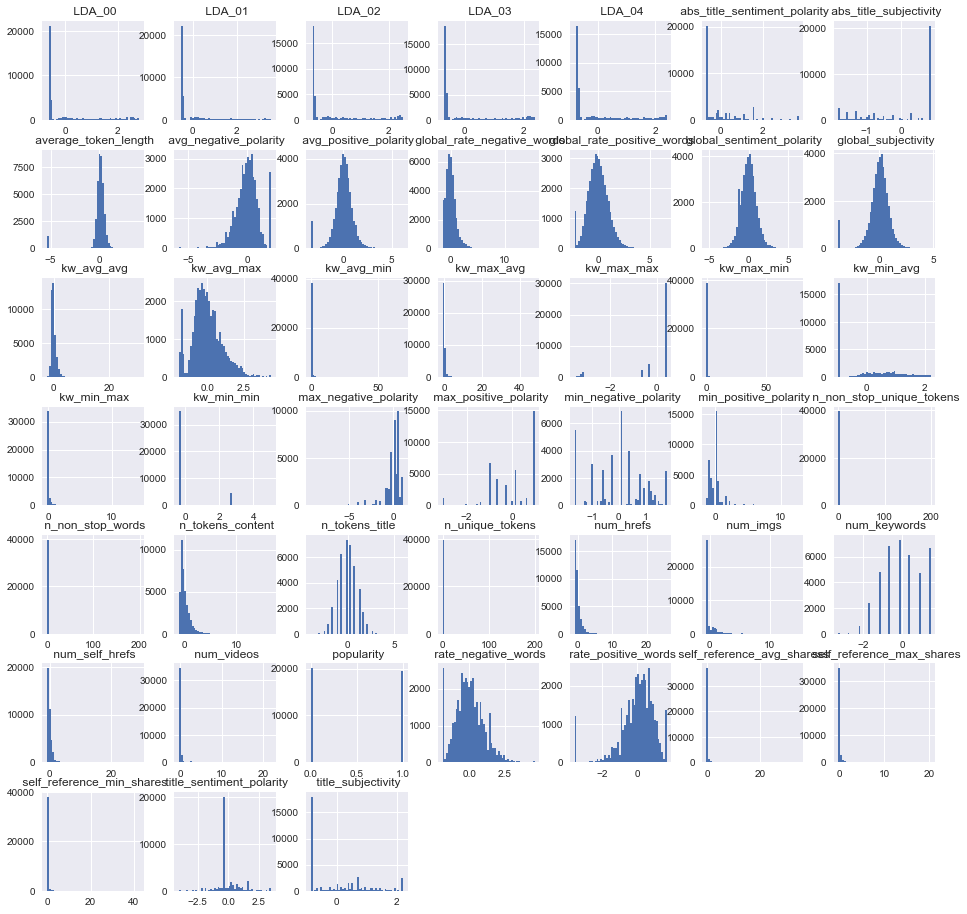

In [188]:
std_data.hist(bins=50, figsize= (16,16))
plt.show()

In [189]:
#std_data.boxplot(bins=50, figsize= (16,16))
#plt.show()

In [190]:
#ax = sbn.boxplot(data=std_data, orient="h", palette="Set2")
#plt.show()

In [191]:
#the features diferent day of the week and article category are binary variables so we justvisualize the data using these variables
#and drop these boolean columns in our reduced feature dataframe

In [205]:
#train test split
train_set,test_set = train_test_split(std_data, test_size=0.20, random_state=99)
X_train_set = train_set.loc[:,:' abs_title_sentiment_polarity']
Y_train_set = train_set.loc[:,' popularity']
# X_train_set.info()
# Y_train_set
X_test_set = test_set.loc[:,:' abs_title_sentiment_polarity']
Y_test_set = test_set.loc[:,' popularity']
X_test_set.info()
Y_test_set.count()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7929 entries, 38203 to 1809
Data columns (total 44 columns):
 n_tokens_title                  7929 non-null float64
 n_tokens_content                7929 non-null float64
 n_unique_tokens                 7929 non-null float64
 n_non_stop_words                7929 non-null float64
 n_non_stop_unique_tokens        7929 non-null float64
 num_hrefs                       7929 non-null float64
 num_self_hrefs                  7929 non-null float64
 num_imgs                        7929 non-null float64
 num_videos                      7929 non-null float64
 average_token_length            7929 non-null float64
 num_keywords                    7929 non-null float64
 kw_min_min                      7929 non-null float64
 kw_max_min                      7929 non-null float64
 kw_avg_min                      7929 non-null float64
 kw_min_max                      7929 non-null float64
 kw_max_max                      7929 non-null float64
 kw_avg_m

7929

In [193]:
#generate lambda values
alphas = 10**np.linspace(-3,2,5)
#np.shape(alphas)
#alphas

In [203]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train_set, Y_train_set)
lasso.set_params(alpha=lassocv.alpha_)
print('All errors are MSE')
print('-'*76)
#for a in alphas:
    #lasso.set_params(alpha=a)
lasso.fit(X_train_set, Y_train_set)
#lasso_train_error = mean_squared_error(Y_train_set, lasso.predict(X_train_set)) 
Y_test_predict = lasso.predict(X_test_set)
print(Y_test_predict)
lasso_test_error = mean_squared_error(Y_test_set,Y_test_predict)
print('alpha: {:7} | train error: {:5} | test error: {}'.
            format(round(a,3),
                   round(lasso_train_error,3),
                   round(lasso_test_error,3)))

print("Missclassification error rate for Lasso with 10-fold CV: " 
       + str(accuracy_score(Y_test_set, (Y_test_predict>0.5),normalize=False)))
#pd.Series(lasso.coef_, index=X_train_set.columns)
confusion_matrix(Y_test_set, (Y_test_predict>0.5).astype(int))




All errors are MSE
----------------------------------------------------------------------------
[ 0.20648018  0.41533968  0.52136366 ...,  0.46373891  0.59909259
  0.3585495 ]
alpha:   100.0 | train error:  0.25 | test error: 0.228
Missclassification error rate for Lasso with 10-fold CV: 4983


array([[2601, 1365],
       [1581, 2382]])